<img src="images/Picture0.png" width=200x />

# Notebook 04a - Logistic Regression

## Instructions
...

## Pre-requisites
...

## Credits
...


## If you are using Colab, save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to a local folder if you are accessing this notebook in Google Colab! Please go to:

```
File -> Make a copy
```


This notebook follows along with the notes found [here](https://drive.google.com/file/d/1ZgX5y6orJboHUCw0w1jHzpMH9V6GaV41/view?usp=sharing).


In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

This notebook follows along with the notes found [here](https://docs.google.com/presentation/d/184uAU5ZRsZEqP7_pEu4POpcAr57CkQfZJtUVBkryFbQ/edit?usp=sharing).
Filled in version [here](https://drive.google.com/file/d/1ZoooJtT_FZj5qIIFk4qZQK8N6DP5vFEk/view?usp=sharing).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Arsenic/data/wells.csv")
display(data)

,switch,arsenic,dist,dist100,assoc,educ,educ4
0,1,2.36,16.826000,0.16826,0,0,0.00
1,1,0.71,47.321999,0.47322,0,0,0.00
2,0,2.07,20.966999,0.20967,0,10,2.50
3,1,1.15,21.486000,0.21486,0,12,3.00
4,1,1.10,40.874001,0.40874,1,14,3.50
...,...,...,...,...,...,...,...
3015,0,0.52,19.347000,0.19347,1,5,1.25
3016,0,1.08,21.386000,0.21386,1,3,0.75
3017,0,0.51,7.708000,0.07708,0,4,1.00
3018,0,0.64,22.841999,0.22842,0,3,0.75


### Wells in Bangladesh

- switch: does the household switch to a new well
- arsenic: arsenic level of respondent's well
- dist: distance (in meters) to the closest known safe well
- assoc: whether any members of the household are active in community organizations
- educ:  the education level of the head of household

See [Chapter 13.7](https://users.aalto.fi/~ave/ROS.pdf) for more details.

<Axes: xlabel='switch', ylabel='arsenic'>

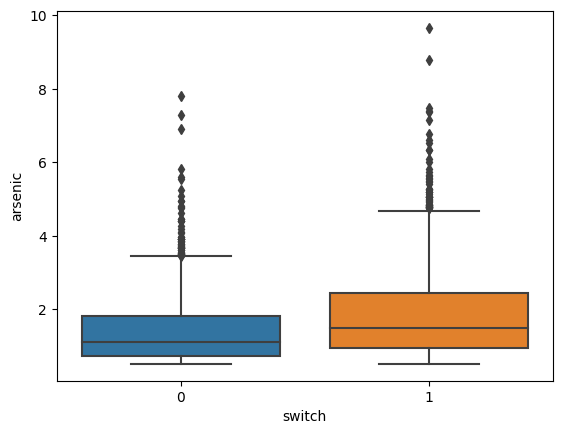

In [ ]:
sns.boxplot(data = data,
            x="switch",
            y="arsenic")



## Check your understanding

What would this boxplot have to look like for you to be confident (not in the statistical sense) that arsenic is a good predictor of whether a household makes a well switch?

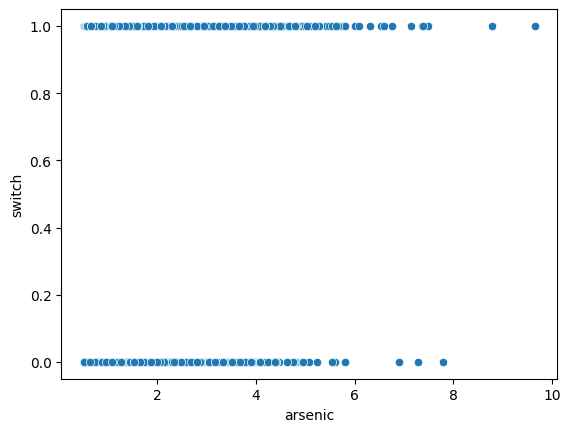

In [ ]:
sns.scatterplot(data=data,  x="arsenic", y="switch");

## Model with Logistic Regression

We can fit the logistic regression model using:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Specify the desired model of y regressing onto x
model_formula = smf.logit('switch ~ arsenic', data = data)

# Fit the model to the data
results = model_formula.fit()

results.params

Optimization terminated successfully.
         Current function value: 0.663688
         Iterations 5


Intercept   -0.305528
arsenic      0.379135
dtype: float64

In [ ]:
# Obtain the model summary
summary_model = results.summary()

# Display output
print(summary_model)

                           Logit Regression Results                           
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 0.02657
Time:                        14:23:09   Log-Likelihood:                -2004.3
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 1.309e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3055      0.070     -4.346      0.000      -0.443      -0.168
arsenic        0.3791      0.039      9.840      0.000       0.304       0.455


## Interpreting the model

When trying to interpret the model, we opt to just use the odds. The odds are given by:
  
$$
\begin{align*}
\text{Odds} &= \frac{{{\pi _i}}}{{1 - {\pi _i}}} \\
&= \frac{P(Success)}{P(Failure)} \\
&= \exp \left( {{\beta _0} + {\beta _1}{x_{1i}} +  \cdots  + {\beta _n}{x_{pi}}} \right)
\end{align*}
$$

Recall, we're using $\pi_i$ to denote the probability for individual $i$, e.g. $p_i \in (0,1)$.


### Interpretation of the Odds

> On average, for every one unit increase in $x _{ji}$ the odds is $exp\left({\beta _j}\right)$ times larger.
  
This implies that we are describing:

$$\frac{{{\pi _{i + 1}}/\left( {1 - {\pi _{i + 1}}} \right)}}{{{\pi _i}/\left( {1 - {\pi _i}} \right)}} = \exp \left( \beta _j  \right)$$

### Interpreting Key for $\beta$

When interpreting $\beta$ in Multiple Logistic Regression, we assume that other covariates are held constant when observing a specific $\beta _j$.

When $\beta _j = 0$, the odds would be $\exp\left({0}\right)=1$.
$\Rightarrow P\left( {{Y} = 1} \right)$ is the same at each level of $x _{ji}$.

When $\beta _j > 0$, the odds would be $1<\exp\left({\beta}\right)<\infty$.
$\Rightarrow P\left( {{Y} = 1} \right)$ increases as $x _{ji}$ increases.

When $\beta _j < 0$, the odds would be $0<\exp\left({\beta}\right)<1$.
$\Rightarrow P\left( {{Y} = 1} \right)$ decreases as $x _{ji}$ increases.

Note: $P\left( {{Y} = 1} \right)$ indicates the event occurred.

## Making Predictions

We can use a built-in prediction method to compute new model estimates.

In [ ]:
# New observations
new_data = {"arsenic": [1, 1.8, 2.4, 4.5, 5.2]}

# Estimate the expected output
y_predictions = results.predict(exog = new_data)
y_predictions

0    0.518393
1    0.593129
2    0.646662
3    0.802276
4    0.841038
dtype: float64

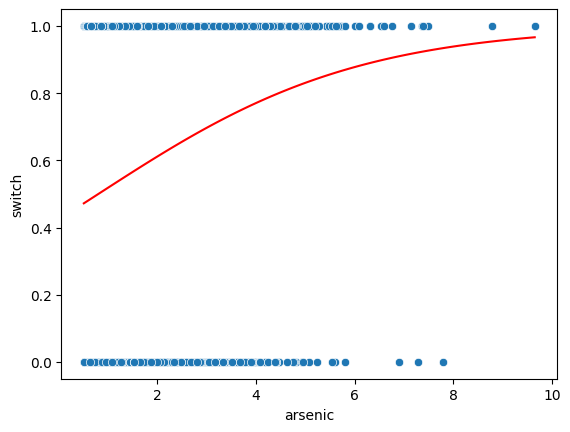

In [ ]:
# Plot raw data
sns.scatterplot(x='arsenic', y='switch', data = data)

# Make a grid of x values for plotting the curve
xgrid = np.linspace(data['arsenic'].min(), data['arsenic'].max(), 100)

# Compute odds over the grid
ogrid = np.exp(results.params[0] + results.params[1]*xgrid)

# Graph the probability curve
plt.plot(xgrid, ogrid/(1+ogrid), color='r')
plt.show()

## Check your understanding

With respect to the fitted simple logistic regression model predicting whether a movie is declared "good" or not using it's length (time), which of the following will be true? You may choose more than one answer.

(i) A plot of the predicted probability that the audience will think a movie is good (y-axis) vs.
Time (x-axis) will have a logistic s-shape.

(ii) A plot of the predicted probability that the audience will think a movie is good (y-axis) vs.
Time (x-axis) will have an exponential shape.

(iii) A plot of the predicted probability that the audience will think a movie is good (y-axis) vs.
Time (x-axis) will have a linear shape.

(iv) A plot of the predicted log-odds of the audience thinking that a movie is good (y-axis) vs.
Time (x-axis) will have a logistic s-shape.

(v) A plot of the predicted log-odds of the audience thinking that a movie is good (y-axis) vs.
Time (x-axis) will have an exponential shape.

(vi) A plot of the predicted log-odds of the audience thinking that a movie is good (y-axis) vs.
Time (x-axis) will have a linear shape.

### Multiple Logistic Regression



In [ ]:
# Specify the desired model of y regressing onto x
model_formula = smf.logit('switch ~ arsenic + dist100', data = data)

# Fit the model to the data
results = model_formula.fit()

results.params

Optimization terminated successfully.
         Current function value: 0.650773
         Iterations 5


Intercept    0.002749
arsenic      0.460775
dist100     -0.896644
dtype: float64

In [ ]:
# Obtain the model summary
summary_model = results.summary()

# Display output
print(summary_model)

                           Logit Regression Results                           
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 0.04551
Time:                        14:33:14   Log-Likelihood:                -1965.3
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 1.995e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0027      0.079      0.035      0.972      -0.153       0.158
arsenic        0.4608      0.041     11.134      0.000       0.380       0.542
dist100       -0.8966      0.104     -8.593      0.0

## Check your understanding

Suppose it is known that this data comes from households who received a discount on their water bill for sharing their data. What assumption of logistic regression might you be worried about and why? Explain in a sentence or two.


## Your Turn: Challenger o-ring data

On January 28, 1986, the NASA space shuttle orbiter Challenger broke apart 73 seconds into its flight causing all crew members aboard to parish. The total failure of the challenger vehicle was the result of the failure of O-Ring seals at liftoff. This event became known as **Space Shuttle Challenger disaster** and was studied continuously.

When the challenger space shuttle was launched, the temperature was colder than expected causing the O-Ring seal to fail. In the following weeks, NASA sought to then test the reliability of the O-Ring under different temperature conditions. The data collected is as-follows:

In [ ]:
oring = [1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0]
temperature = [53, 56, 57, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 80, 81]

**Note:** This data was available prior to the fateful launch of Challenger; however, there was a convincing argument made using the data to postpone or cancel the launch.

## a: Data Set Import

Please construct a pandas data frame called `challenger` using the two variables `oring` and `temperature` given above.

Obtain the frequency counts for the input data.

## b: Fit Simple Logistic Regression

With the `challenger` data frame, please fit a simple logistic regression such that would regress `oring` onto `temperature`.

Write down the model formula.

---

answer

---

With the model formula written, let's use statsmodels to fit the data.

Obtain the model summary information.

## c. Interpret the $\beta$ coefficient

---

answer

---


## d: Perform a Hypothesis Test

Using information from the challenger model summary, please perform a two-sided hypothesis test for the $\beta_1$ parameter.

$$
\begin{align*}
H_0: \beta_1 = 0\\
H_A: \beta_1 \neq 0\\
\end{align*}
$$

What was the conclusion from the hypothesis test? Did you reject the null hypothesis?

## e. Obtain a prediction

On the day of the Challenger launch, the outside air was $\text{temperature} = 31$ degrees Fahrenheit. Using the model we have created, obtain a prediction.

What would happen if NASA waited to launch challenger until the temperature was at 51 degrees Farhenheit?

---

answer

---

# Your Turn: Credit Default

Let's take a look at some credit card default data available on the UCI Irvine Repository.

<https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients>

There are 30000 observations and 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, - 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005
 (-1=pay duly, 1=payment delay for - one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## a: Import data set

Please import the data set from:

<https://raw.githubusercontent.com/inmas-training/fa21-statistical-methods-workshop/main/data/UCI_Credit_Card.csv>

## b: Verify the data

Please verify the data has been imported correcting by looking at data attributes and checking the start and end of the data frame.

## c: Explore the Data

Make a few different graphs using seabon on variables that you find interesting.

## d: Construct a model

Next, let's construct a model on `default.payment.next.month ~ LIMIT_BAL + EDUCATION + SEX`.

When a variable has periods, we need to "quote" it using `Q("")`, e.g. `Q("default.payment.next.month")`'

Are all the parameter coefficients in the model significant according to the hypothesis testing?

---

answer

---

Refit a model using only coefficients found to be signficant.

Please interpret each parameter of the new model. Recall, we hold other parameters constant when we are trying to interpret.

---

answer

---

## e: Construct your own model!

Explore crafting your own model on the credit data.